<a href="https://colab.research.google.com/github/JapiKredi/Pinnacle_AI_program_AnalyticsVidyha/blob/main/Ridge_and_Lasso_Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importing libraries
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
#Defining independent variable as angles from 60deg to 300deg converted to radians
x = np.array([i*np.pi/180 for i in range(10,360,3)])

In [3]:
x

array([0.17453293, 0.2268928 , 0.27925268, 0.33161256, 0.38397244,
       0.43633231, 0.48869219, 0.54105207, 0.59341195, 0.64577182,
       0.6981317 , 0.75049158, 0.80285146, 0.85521133, 0.90757121,
       0.95993109, 1.01229097, 1.06465084, 1.11701072, 1.1693706 ,
       1.22173048, 1.27409035, 1.32645023, 1.37881011, 1.43116999,
       1.48352986, 1.53588974, 1.58824962, 1.6406095 , 1.69296937,
       1.74532925, 1.79768913, 1.85004901, 1.90240888, 1.95476876,
       2.00712864, 2.05948852, 2.11184839, 2.16420827, 2.21656815,
       2.26892803, 2.32128791, 2.37364778, 2.42600766, 2.47836754,
       2.53072742, 2.58308729, 2.63544717, 2.68780705, 2.74016693,
       2.7925268 , 2.84488668, 2.89724656, 2.94960644, 3.00196631,
       3.05432619, 3.10668607, 3.15904595, 3.21140582, 3.2637657 ,
       3.31612558, 3.36848546, 3.42084533, 3.47320521, 3.52556509,
       3.57792497, 3.63028484, 3.68264472, 3.7350046 , 3.78736448,
       3.83972435, 3.89208423, 3.94444411, 3.99680399, 4.04916

In [5]:
#Setting seed for reproducability
# The np.random.seed(10) function initializes the random number generator with a specific seed value (in this case, 10).
# This means that any random numbers generated after setting the seed will be the same each time you run the code.
np.random.seed(10)

In [6]:
#Defining the target/dependent variable as sine of the independent variable
y = np.sin(x) + np.random.normal(0,0.15,len(x))

In [7]:
y

array([ 0.37338615,  0.3322429 ,  0.04382731,  0.32431058,  0.46780699,
        0.31460543,  0.5092983 ,  0.53132035,  0.55983662,  0.57562499,
        0.70774154,  0.86245397,  0.57457995,  0.90895069,  0.82230527,
        0.88592269,  0.67755776,  0.89489024,  1.1214746 ,  0.75853412,
        0.64303338,  0.69479891,  1.01020625,  1.33937228,  1.15882176,
        1.24708803,  1.01426321,  1.20954715,  0.95687685,  1.08452678,
        0.94471017,  0.89197371,  0.98116794,  0.87409727,  1.12345482,
        0.93555978,  0.94297909,  0.80652245,  1.01750841,  0.68884008,
        0.86507918,  0.67872292,  0.55374337,  0.58265845,  0.4949728 ,
        0.54167179,  0.47904823,  0.53163511,  0.52314405,  0.36861809,
        0.33813434,  0.33573584,  0.16094003,  0.297033  ,  0.26550681,
        0.11769286,  0.39410505,  0.12016643, -0.08659734, -0.17619641,
       -0.20847552, -0.30021039, -0.10631958, -0.43023966, -0.38677492,
       -0.50201267, -0.31254413, -0.72782148, -0.61356778, -0.62

In [8]:
#Creating the dataframe using independent and dependent variable
data = pd.DataFrame(np.column_stack([x,y]),columns=['x','y'])

In [9]:
#Printing first 5 rows of the data
data.head()

,x,y
0,0.174533,0.373386
1,0.226893,0.332243
2,0.279253,0.043827
3,0.331613,0.324311
4,0.383972,0.467807


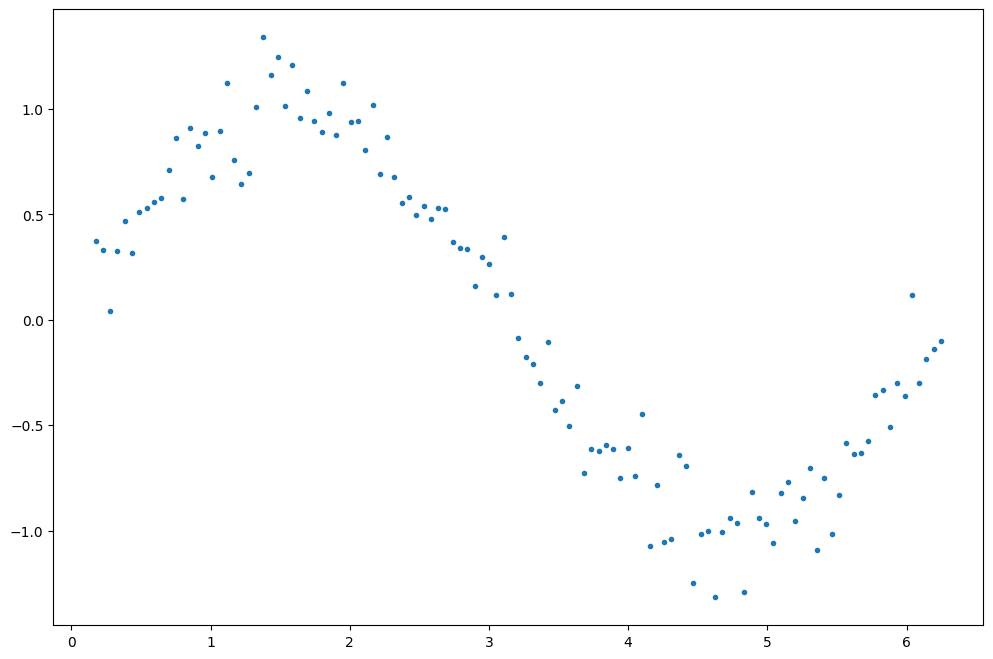

In [13]:
#Plotting the dependent and independent variables
plt.figure(figsize=(12,8))
plt.plot(data['x'],data['y'],'.')

In [ ]:
# polynomial regression with powers of x from 1 to 15
for i in range(2,16):  #power of 1 is already there, hence starting with 2
    colname = 'x_%d'%i      #new var will be x_power
    data[colname] = data['x']**i
data.head()

,x,y,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10,x_11,x_12,x_13,x_14,x_15
0,0.174533,0.373386,0.030462,0.005317,0.000928,0.000162,0.000028,0.000005,8.610313e-07,1.502783e-07,2.622851e-08,4.577739e-09,7.989662e-10,1.394459e-10,2.433790e-11,4.247765e-12
1,0.226893,0.332243,0.051480,0.011681,0.002650,0.000601,0.000136,0.000031,7.023697e-06,1.593626e-06,3.615823e-07,8.204043e-08,1.861438e-08,4.223469e-09,9.582748e-10,2.174257e-10
2,0.279253,0.043827,0.077982,0.021777,0.006081,0.001698,0.000474,0.000132,3.698101e-05,1.032705e-05,2.883856e-06,8.053244e-07,2.248890e-07,6.280085e-08,1.753731e-08,4.897340e-09
3,0.331613,0.324311,0.109967,0.036466,0.012093,0.004010,0.001330,0.000441,1.462338e-04,4.849296e-05,1.608088e-05,5.332620e-06,1.768364e-06,5.864117e-07,1.944615e-07,6.448586e-08
4,0.383972,0.467807,0.147435,0.056611,0.021737,0.008346,0.003205,0.001231,4.724984e-04,1.814264e-04,6.966273e-05,2.674857e-05,1.027071e-05,3.943671e-06,1.514261e-06,5.814344e-07


### Creating test and train Set Randomly

In [14]:
data['randNumCol'] = np.random.randint(1, 6, data.shape[0])
train=data[data['randNumCol']<=3]
test=data[data['randNumCol']>3]
train = train.drop('randNumCol', axis=1)
test = test.drop('randNumCol', axis=1)

## Linear Regression

In [15]:
#Import Linear Regression model from scikit-learn.
from sklearn.linear_model import LinearRegression

In [16]:
#Separating the independent and dependent variables
X_train = train.drop('y', axis=1).values
y_train = train['y'].values
X_test = test.drop('y', axis=1).values
y_test = test['y'].values

In [17]:
X_train

array([[0.27925268],
       [0.33161256],
       [0.38397244],
       [0.43633231],
       [0.48869219],
       [0.54105207],
       [0.59341195],
       [0.64577182],
       [0.6981317 ],
       [0.75049158],
       [0.85521133],
       [0.95993109],
       [1.11701072],
       [1.22173048],
       [1.27409035],
       [1.32645023],
       [1.53588974],
       [1.58824962],
       [1.69296937],
       [1.85004901],
       [1.95476876],
       [2.00712864],
       [2.05948852],
       [2.16420827],
       [2.21656815],
       [2.26892803],
       [2.32128791],
       [2.42600766],
       [2.47836754],
       [2.58308729],
       [2.63544717],
       [2.7925268 ],
       [2.84488668],
       [3.05432619],
       [3.10668607],
       [3.15904595],
       [3.31612558],
       [3.42084533],
       [3.52556509],
       [3.63028484],
       [3.68264472],
       [3.78736448],
       [3.83972435],
       [3.89208423],
       [3.99680399],
       [4.10152374],
       [4.15388362],
       [4.206

In [18]:
#Linear regression with one features
independent_variable_train = X_train[:,0:1]

linreg = LinearRegression(normalize=True)
linreg.fit(independent_variable_train,y_train)
y_train_pred = linreg.predict(independent_variable_train)

rss_train = sum((y_train_pred-y_train)**2) / X_train.shape[0]

independent_variable_test = X_test[:,0:1]
y_test_pred = linreg.predict(independent_variable_test)
rss_test = sum((y_test_pred-y_test)**2)/ X_test.shape[0]

print("Training Error", rss_train)
print("Testing Error",rss_test)

plt.plot(X_train[:,0:1],y_train_pred)
plt.plot(X_train[:,0:1],y_train,'.')

TypeError: LinearRegression.__init__() got an unexpected keyword argument 'normalize'

Training Error 0.0214724817709658
Testing Error 0.03045187888196876


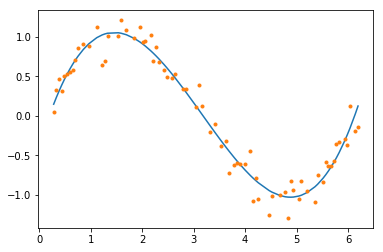

In [ ]:
#Linear regression with three features
independent_variable_train = X_train[:,0:3]

linreg = LinearRegression(normalize=True)
linreg.fit(independent_variable_train,y_train)
y_train_pred = linreg.predict(independent_variable_train)

rss_train = sum((y_train_pred-y_train)**2) / X_train.shape[0]

independent_variable_test = X_test[:,0:3]
y_test_pred = linreg.predict(independent_variable_test)
rss_test = sum((y_test_pred-y_test)**2)/ X_test.shape[0]

print("Training Error", rss_train)
print("Testing Error",rss_test)

plt.plot(X_train[:,0:1],y_train_pred)
plt.plot(X_train[:,0:1],y_train,'.')

Training Error 0.018764347745722183
Testing Error 0.03217644572352373


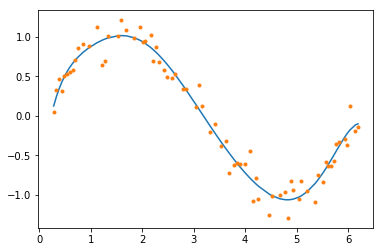

In [ ]:
#Linear regression with Seven features
independent_variable_train = X_train[:,0:9]

linreg = LinearRegression(normalize=True)
linreg.fit(independent_variable_train,y_train)
y_train_pred = linreg.predict(independent_variable_train)

rss_train = sum((y_train_pred-y_train)**2) / X_train.shape[0]

independent_variable_test = X_test[:,0:9]
y_test_pred = linreg.predict(independent_variable_test)
rss_test = sum((y_test_pred-y_test)**2)/ X_test.shape[0]

print("Training Error", rss_train)
print("Testing Error",rss_test)

plt.plot(X_train[:,0:1],y_train_pred)
plt.plot(X_train[:,0:1],y_train,'.')

In [ ]:
# defining a function which will fit linear regression model, plot the results, and return the coefficients
def linear_regression(train_x, train_y, test_x, test_y, features, models_to_plot):

    #Fit the model
    linreg = LinearRegression(normalize=True)
    linreg.fit(train_x,train_y)
    train_y_pred = linreg.predict(train_x)
    test_y_pred = linreg.predict(test_x)

    #Check if a plot is to be made for the entered features
    if features in models_to_plot:
        plt.subplot(models_to_plot[features])
        plt.tight_layout()
        plt.plot(train_x[:,0:1],train_y_pred)

        plt.plot(train_x[:,0:1],train_y,'.')

        plt.title('Number of Predictors: %d'%features)

    #Return the result in pre-defined format
    rss_train = sum((train_y_pred-train_y)**2)/train_x.shape[0]
    ret = [rss_train]

    rss_test = sum((test_y_pred-test_y)**2)/test_x.shape[0]
    ret.extend([rss_test])

    ret.extend([linreg.intercept_])
    ret.extend(linreg.coef_)

    return ret

In [ ]:
#Initialize a dataframe to store the results:
col = ['mrss_train','mrss_test','intercept'] + ['coef_Var_%d'%i for i in range(1,16)]
ind = ['Number_of_variable_%d'%i for i in range(1,16)]
coef_matrix_simple = pd.DataFrame(index=ind, columns=col)

In [ ]:
#Define the number of features for which a plot is required:
models_to_plot = {1:231,3:232,6:233,9:234,12:235,15:236}

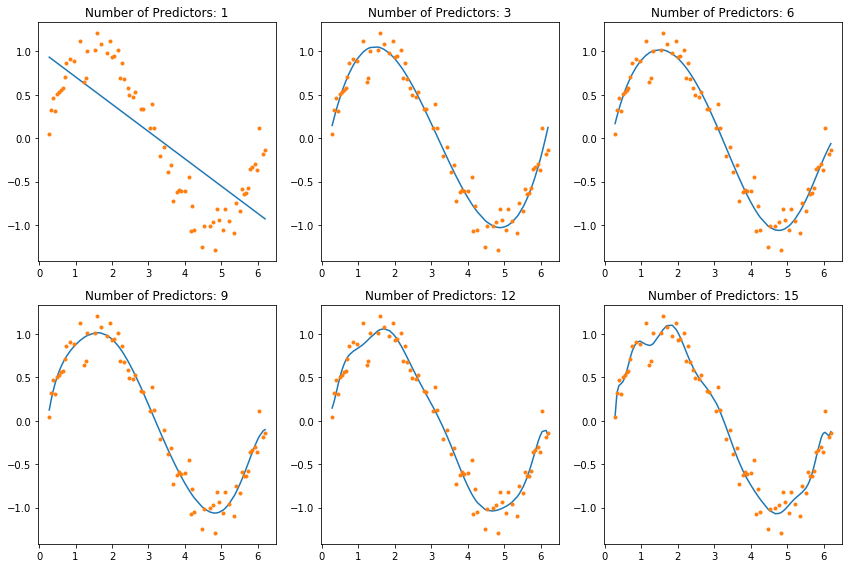

In [ ]:
#Iterate through all powers and store the results in a matrix form
plt.figure(figsize=(12,8))
for i in range(1,16):
    train_x = X_train[:,0:i]
    train_y = y_train
    test_x = X_test[:,0:i]
    test_y = y_test

    coef_matrix_simple.iloc[i-1,0:i+3] = linear_regression(train_x,train_y, test_x, test_y, features=i, models_to_plot=models_to_plot)

In [ ]:
#Set the display format to be scientific for ease of analysis
pd.options.display.float_format = '{:,.2g}'.format
coef_matrix_simple

,mrss_train,mrss_test,intercept,coef_Var_1,coef_Var_2,coef_Var_3,coef_Var_4,coef_Var_5,coef_Var_6,coef_Var_7,coef_Var_8,coef_Var_9,coef_Var_10,coef_Var_11,coef_Var_12,coef_Var_13,coef_Var_14,coef_Var_15
Number_of_variable_1,0.21,0.19,1,-0.31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Number_of_variable_2,0.21,0.19,1.1,-0.39,0.012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Number_of_variable_3,0.021,0.03,-0.4,2.2,-0.99,0.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Number_of_variable_4,0.021,0.03,-0.43,2.3,-1,0.12,-0.001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Number_of_variable_5,0.02,0.023,-0.096,1.2,0.0084,-0.29,0.069,-0.0043,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Number_of_variable_6,0.019,0.028,-0.4,2.5,-1.6,0.66,-0.2,0.031,-0.0018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Number_of_variable_7,0.019,0.028,-0.38,2.4,-1.5,0.53,-0.15,0.021,-0.00067,-5.1e-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Number_of_variable_8,0.019,0.032,-0.85,5.1,-7,6,-3.1,0.92,-0.16,0.015,-0.00058,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Number_of_variable_9,0.019,0.032,-0.94,5.7,-8.5,7.7,-4.3,1.4,-0.28,0.033,-0.002,5e-05,NaN,NaN,NaN,NaN,NaN,NaN
Number_of_variable_10,0.018,0.044,-2.4,16,-38,50,-39,19,-6,1.2,-0.15,0.011,-0.00033,NaN,NaN,NaN,NaN,NaN


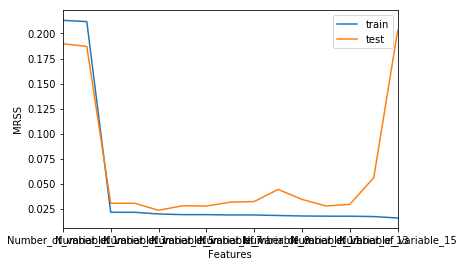

In [ ]:
coef_matrix_simple[['mrss_train','mrss_test']].plot()
plt.xlabel('Features')
plt.ylabel('MRSS')
plt.legend(['train', 'test'])